🎯 Project Title:
"Customer Purchase Prediction using Machine Learning"

In [176]:
# Importing essential libraries for data analysis and visualization
# pandas for data handling, matplotlib and seaborn for plotting
# %matplotlib inline is used to display plots directly in Jupyter Notebook


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [177]:
#import the train data

df_train = pd.read_csv('/content/drive/MyDrive/Machine_learning_dataset/archive/train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [178]:
#import the test data

df_test = pd.read_csv('/content/drive/MyDrive/Machine_learning_dataset/archive/test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [179]:
# Merging the training and test datasets into a single DataFrame for consistent preprocessing
# Note: _append() is used for newer versions of pandas (>= 2.0), replacing the deprecated append()

df = df_train._append(df_test)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [180]:
# Displaying the summary of the dataset including data types, non-null counts, and memory usage

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [181]:
# Generating summary statistics for numerical columns (count, mean, std, min, max, etc.)
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [182]:
# Dropping the 'User_ID' column as it is not useful for model training

df.drop('User_ID', axis=1, inplace=True)

In [183]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


🎯Data Preprocessing:

What is Data Preprocessing?

Data preprocessing is the step-by-step process of cleaning, transforming, and organizing raw data to make it suitable for machine learning models or analysis.

In [184]:
pd.get_dummies(df['Gender'])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
233594,True,False
233595,True,False
233596,True,False
233597,True,False


In [185]:
# Encoding 'Gender' column: F as 0, M as 1

df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [186]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [187]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

🔢 What is Ordinal Encoding?

Ordinal Encoding is a method used to convert categorical data (text labels) into numerical values — while preserving the order or ranking of the categories.

✅ When to Use:
When your categories have an inherent order or ranking
(like education levels, age groups, satisfaction ratings: Low, Medium, High)

In [188]:
# Ordinal Encoding: Converting age groups into ordered numerical values based on age progression

age_mapping = {
    '0-17': 1,
    '18-25': 2,
    '26-35': 3,
    '36-45': 4,
    '46-50': 5,
    '51-55': 6,
    '55+': 7
}

# Apply the mapping
df['Age'] = df['Age'].map(age_mapping)

df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [189]:
df.Age.unique()

array([1, 7, 3, 5, 6, 4, 2])

In [190]:
# One-Hot Encoding 'City_Category' column, dropping the first category to avoid dummy variable trap


df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [191]:
# Concatenating the encoded city category columns to the main DataFrame

df = pd.concat([df, df_city], axis=1)

df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [192]:
# Dropping the 'City_Category' column as it's not useful for model training

df.drop('City_Category', axis=1, inplace=True)

In [193]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,False,True


In [194]:
# Creating a dictionary to count missing (null) values in each column that contains at least one null


null_counts = {col: val.isnull().sum() for col, val in df.items() if val.isnull().any()}
null_counts

{'Product_Category_2': np.int64(245982),
 'Product_Category_3': np.int64(545809),
 'Purchase': np.int64(233599)}

In [195]:
# Filling missing values in 'Product_Category_2' with the most frequent value (mode)

df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [196]:
df['Product_Category_2'].isnull().sum()

np.int64(0)

In [197]:
# Filling missing values in 'Product_Category_3' with the most frequent value (mode)

df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [198]:
df['Product_Category_3'].isnull().sum()

np.int64(0)

In [199]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [200]:
# Removing the '+' symbol from values in the 'Stay_In_Current_City_Years' column (e.g., '4+' becomes '4')


df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

In [201]:
# Converting the 'Stay_In_Current_City_Years' column from object type to integer for numerical analysis


df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(2), float64(3), int64(6), object(1)
memory usage: 67.3+ MB


In [203]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

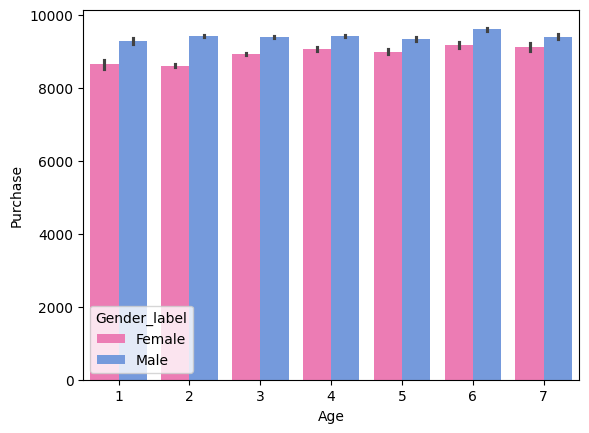

In [205]:
# Create a new column with readable gender labels
df['Gender_label'] = df['Gender'].map({0: 'Female', 1: 'Male'})

# Plotting a barplot showing average purchase by age and gender with custom colors
sns.barplot(x='Age', y='Purchase', hue='Gender_label', data=df, palette=['#FF69B4', '#6495ED'])  # Pink for Female, Blue for Male

<ipython-input-206-8c8bcf2e6452>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender_label', y='Percentage', data=gender_purchase, palette=['#FF69B4', '#6495ED'])


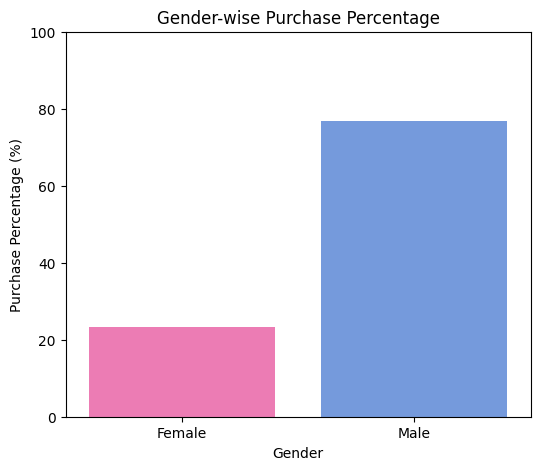

In [206]:
# This code block visualizes the percentage of total purchases made by each gender.
# First, it maps numerical gender values to labels ('Female', 'Male'),
# then calculates the total purchase amount for each gender and converts it into percentages.
# Finally, it plots the gender-wise purchase contribution using a barplot with custom colors.


df['Gender_label'] = df['Gender'].map({0: 'Female', 1: 'Male'})

gender_purchase = df.groupby('Gender_label')['Purchase'].sum().reset_index()

total_purchase = gender_purchase['Purchase'].sum()
gender_purchase['Percentage'] = (gender_purchase['Purchase'] / total_purchase) * 100


# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x='Gender_label', y='Percentage', data=gender_purchase, palette=['#FF69B4', '#6495ED'])

# Labels and title
plt.title('Gender-wise Purchase Percentage')
plt.ylabel('Purchase Percentage (%)')
plt.xlabel('Gender')
plt.ylim(0, 100)
plt.show()


<ipython-input-207-f2c216099c10>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group Label', y='Purchase', data=age_purchase, palette='viridis')


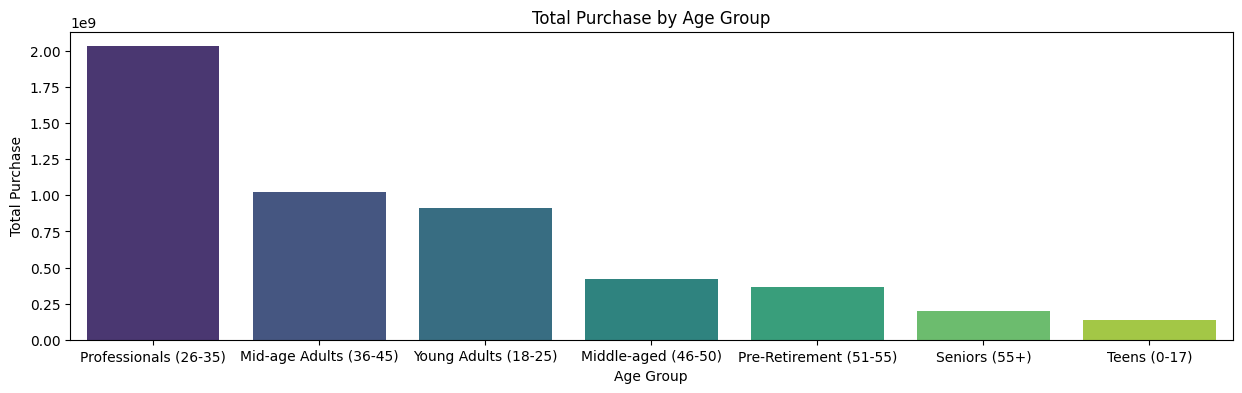

In [207]:
# Map numerical age values to descriptive labels, group data by age group,
# calculate total purchases for each, and plot to visualize which age group contributes the most to purchases.

age_labels = {
    1: 'Teens (0-17)',
    2: 'Young Adults (18-25)',
    3: 'Professionals (26-35)',
    4: 'Mid-age Adults (36-45)',
    5: 'Middle-aged (46-50)',
    6: 'Pre-Retirement (51-55)',
    7: 'Seniors (55+)'
}

df['Age Group Label'] = df['Age'].map(age_labels)

age_purchase = df.groupby('Age Group Label')['Purchase'].sum().reset_index()

# Sorting to find the maximum
age_purchase = age_purchase.sort_values(by='Purchase', ascending=False)

# Plotting the result
plt.figure(figsize=(15, 4))
sns.barplot(x='Age Group Label', y='Purchase', data=age_purchase, palette='viridis')
#plt.xticks(rotation=45)
plt.title('Total Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase')
plt.show()



<Axes: xlabel='Occupation', ylabel='Purchase'>

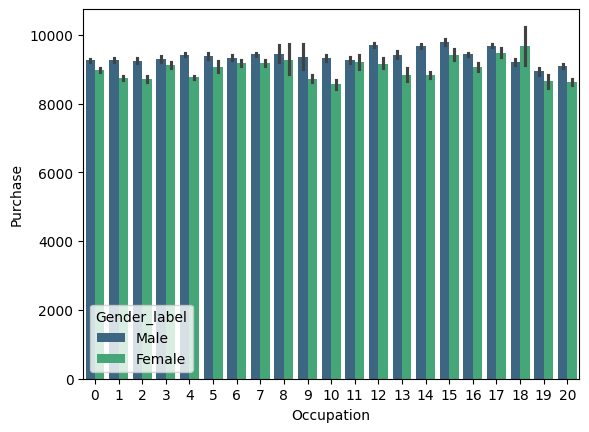

In [208]:
# Creating a barplot to compare purchase amounts across different occupations


sns.barplot(x='Occupation', y='Purchase', data=df, hue='Gender_label', palette='viridis')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

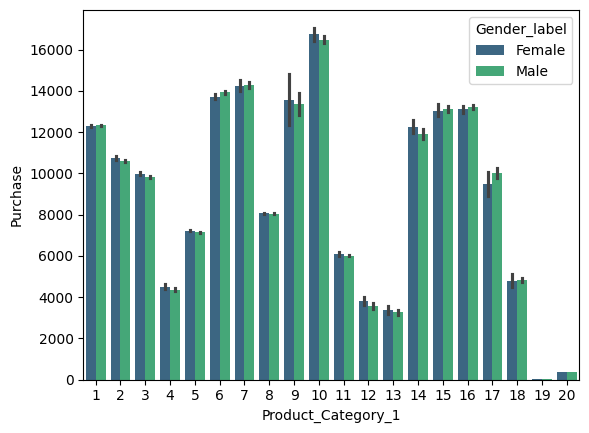

In [209]:
# Creating a barplot to visualize the average purchase amount across different Product_Category_1 groups


sns.barplot(x='Product_Category_1', y='Purchase', data=df, hue='Gender_label', palette='viridis')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

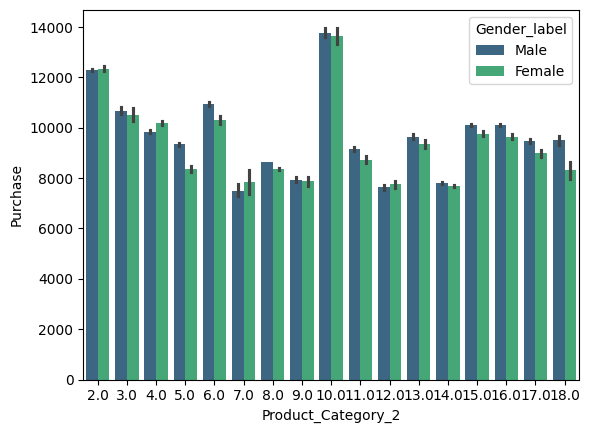

In [210]:
# Creating a barplot to visualize the average purchase amount across different Product_Category_2 groups,

sns.barplot(x='Product_Category_2', y='Purchase', data=df, hue='Gender_label', palette='viridis')

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

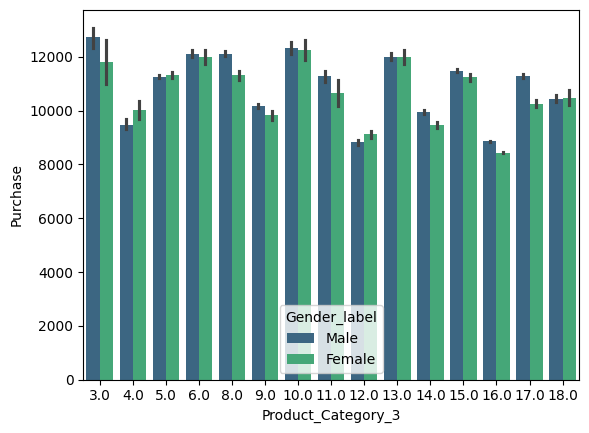

In [211]:
# Creating a barplot to visualize the average purchase amount across different Product_Category_3 groups

sns.barplot(x='Product_Category_3', y='Purchase', data=df, hue='Gender_label', palette='viridis')

In [212]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C',
       'Gender_label', 'Age Group Label'],
      dtype='object')

In [213]:
# Creating a new DataFrame 'main_df' by selecting specific relevant columns from the original 'df'
# for further analysis or modeling purposes

main_df = df[['Gender', 'Age', 'Occupation','Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
              'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C']]

In [214]:
main_df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [215]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  int64  
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   B                           783667 non-null  int64  
 10  C                           783667 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 71.7 MB


In [216]:
Q1 = main_df['Purchase'].quantile(0.25)
Q3 = main_df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only non-outlier rows
main_df = main_df[(main_df['Purchase'] >= lower_bound) & (main_df['Purchase'] <= upper_bound)]

In [217]:
# Creating the test dataset by selecting rows where the 'Purchase' column has missing (null) values

df_test = main_df[main_df['Purchase'].isnull()]

In [218]:
# Creating the training dataset by selecting rows where the 'Purchase' column has non-missing (not null) values

df_train = main_df[main_df['Purchase'].notnull()]

In [219]:
# Dropping the target column 'Purchase' from df_train to create the feature set X
# Then checking the shape (rows, columns) of the resulting feature dataframe

X = df_train.drop('Purchase', axis=1)
#X.head()
X.shape


(547391, 10)

In [220]:
# Selecting the target variable 'Purchase' from the main dataframe and assigning it to y

y = df_train['Purchase']
y.shape

(547391,)

In [221]:
# Splitting the dataset into training and testing sets using sklearn's train_test_split
# 33% of the data is used for testing and 67% for training
# random_state=42 ensures reproducibility of the split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [222]:
# Standardizing the feature data using StandardScaler
# Fitting the scaler to the training data and transforming it (scaling it to have mean 0 and variance 1)
# Then transforming the test data based on the same scaler (using the parameters derived from the training set)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit to training data and transform
X_test = scaler.transform(X_test)  # Transform test data using the same scaler


In [223]:
# Importing the necessary modules for linear regression and evaluation metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Initialize the Linear Regression model
model = LinearRegression()

# 2. Train (fit) the model on the training data
model.fit(X_train, y_train)

# 3. Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)

# 4. Evaluate the model using common regression metrics
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)   # Mean Squared Error
r2 = r2_score(y_test, y_pred)              # R-squared score (goodness of fit)

# Print out the evaluation results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Absolute Error: 3494.0163973257963
Mean Squared Error: 20770920.238870755
R-squared: 0.15038557355226834


Observation:

📊 Model Performance
Mean Absolute Error (MAE): 3494.02

Mean Squared Error (MSE): 20,770,920.24

R-squared (R²): 0.1504

🧠 What This Means:
MAE (3494):
On average, your model's predictions are off by about ₹3494. Lower is better, but for purchase prediction, this could still be high depending on the purchase range.

MSE (20.7M):
This is a squared metric and more sensitive to large errors (outliers). It tells us there's still some significant variation in prediction errors.

R² (0.15):
Your model explains only 15% of the variance in the target variable. That’s a relatively low score, meaning the model isn’t capturing the relationship very well.



In [224]:
# Importing RandomForestRegressor and initializing the model with a fixed random state for reproducibility
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Training the Random Forest model on the training data
model.fit(X_train, y_train)

# Making predictions on the test dataset using the trained model
y_pred = model.predict(X_test)

# Importing evaluation metrics to assess model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculating error metrics to evaluate the accuracy of predictions
mae = mean_absolute_error(y_test, y_pred)      # Average absolute difference between predicted and actual values
mse = mean_squared_error(y_test, y_pred)       # Average squared difference (penalizes larger errors more)
r2 = r2_score(y_test, y_pred)                  # Proportion of variance explained by the model (goodness of fit)

# Displaying the evaluation results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Absolute Error: 2214.00531112924
Mean Squared Error: 9231304.94521263
R-squared: 0.6224023891963422


📊 Observation: Random Forest Regressor Model Performance
After training a Random Forest Regressor on the dataset, the model's performance metrics are:

Mean Absolute Error (MAE): 2214.01

Mean Squared Error (MSE): 9,231,304.95

R-squared (R²): 0.6224

✅ Insights:
🔍 The MAE of ~2214 indicates that on average, the model’s predictions are off by about 2214 units from the actual purchase values — a significant improvement compared to linear regression.

🧮 The MSE is lower than previous models, showing reduced large error deviations.

📈 The R² score of 0.6224 means that the model explains about 62.24% of the variability in purchase behavior, which is a much better fit than your earlier Linear Regression model (which had R² ≈ 0.15).

💡 Conclusion:
The Random Forest Regressor outperforms the Linear Regression model in terms of both error reduction and explanatory power.

It's more effective at capturing the non-linear relationships present in the data.

In [225]:
from xgboost import XGBRegressor

# 1. Initialize and train the XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# 2. Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# 3. Import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 4. Evaluate using predictions from XGBoost
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

# 5. Print the results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)



Mean Absolute Error: 2180.9847100705942
Mean Squared Error: 8406356.121755656
R-squared: 0.6561461238710575


In [226]:
from sklearn.tree import DecisionTreeRegressor

# 1. Initialize the Decision Tree Regressor with a fixed random state for reproducibility
dt_model = DecisionTreeRegressor(random_state=42)

# 2. Train the model on the training data
dt_model.fit(X_train, y_train)

# 3. Predict the target values for the test set
y_pred_dt = dt_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 4. Evaluate the model performance using common regression metrics
mae = mean_absolute_error(y_test, y_pred_dt)      # Measures the average absolute error
mse = mean_squared_error(y_test, y_pred_dt)       # Measures the average squared error
r2 = r2_score(y_test, y_pred_dt)                  # Indicates the goodness of fit (1 is perfect)

# 5. Display the evaluation results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Absolute Error: 2344.000206973302
Mean Squared Error: 10929440.929930061
R-squared: 0.5529417772401147


In [227]:
# Import necessary libraries for hyperparameter tuning and model
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200],        # Number of trees in the model
    'max_depth': [3, 6, 10],           # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2]  # Step size shrinkage used to prevent overfitting
}

# Initialize the XGBoost Regressor model
xgb = XGBRegressor(random_state=42)

# Set up GridSearchCV to find the best hyperparameter combination using 3-fold cross-validation
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1)

# Fit the model to the training data to perform hyperparameter tuning
grid.fit(X_train, y_train)

# Print the best combination of hyperparameters and corresponding R² score
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)


Best parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best score: 0.6632228447289115


✅ Best Performing Model: XGBoost Regressor
Lowest MAE: Indicates the smallest average error in predictions.

Lowest MSE: Suggests fewer large errors.

Highest R² Score (0.66): Shows that XGBoost explains 66% of the variance in purchase prediction — the best among all.

🏁 Conclusion:
You should choose the XGBoost Regressor for your model training and final prediction. It consistently outperformed the others across all evaluation metrics.